/tmp/ipython-input-364688803.py:14: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dados_json = pd.read_json(res.text)


Quantidade de dados faltantes por campo:
 customerID             0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Charges             7267
dtype: int64


/tmp/ipython-input-364688803.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_expandido['Charges'].fillna(0, inplace=True)


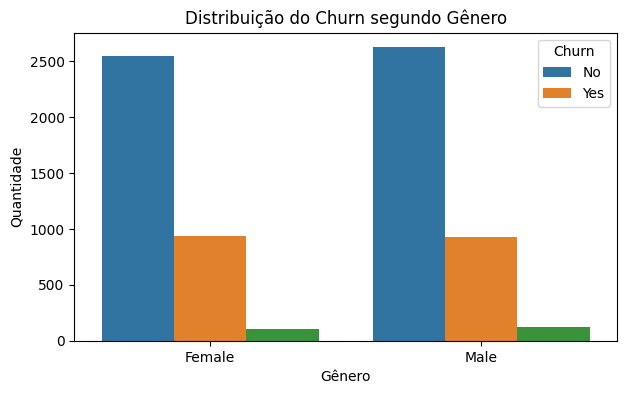

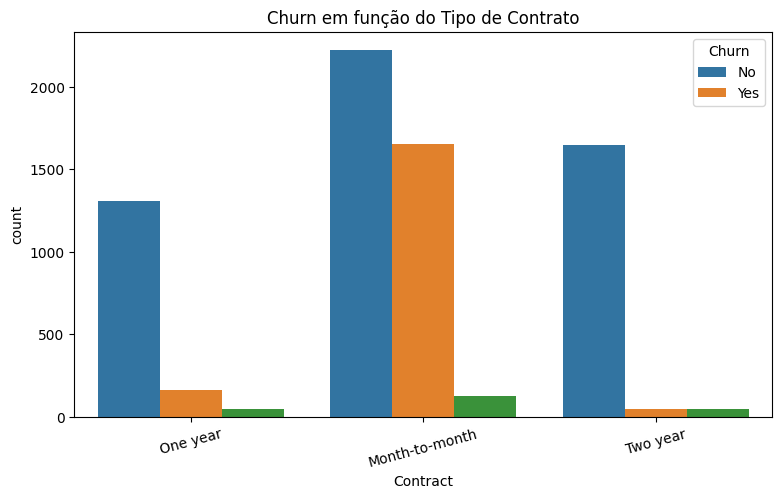

/tmp/ipython-input-364688803.py:55: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_expandido[df_expandido['Churn']=='Yes'], x='tenure', shade=True, label='Churn=Sim')
/tmp/ipython-input-364688803.py:56: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_expandido[df_expandido['Churn']=='No'], x='tenure', shade=True, label='Churn=Não')


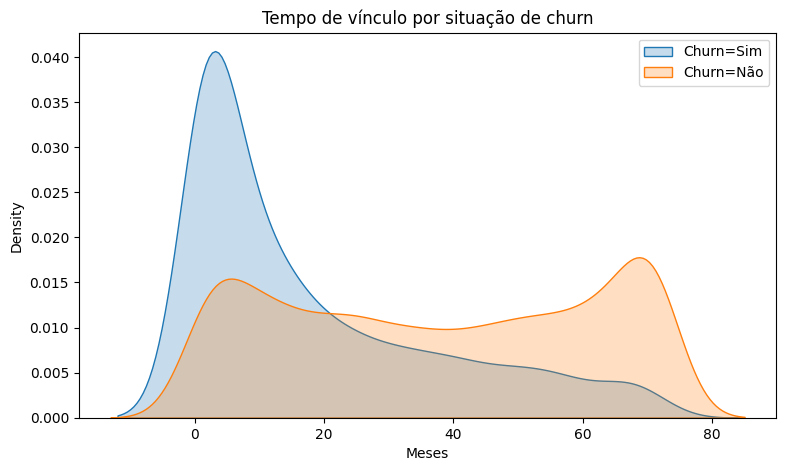

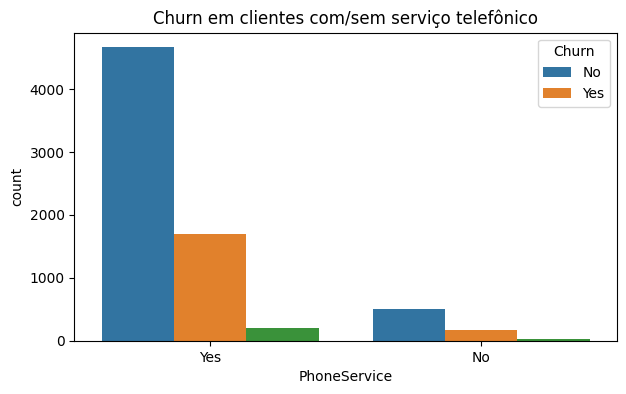


# Relatório ETL e Análise Exploratória - Telecom X

## Objetivo
Explorar e compreender os fatores que levam à evasão dos clientes (churn) da empresa Telecom X.

## Etapas de ETL
- Extração dos dados da API pública do GitHub.
- Transformação: expansão dos dados aninhados para estrutura tabular.
- Limpeza: identificação e tratamento dos dados faltantes, especialmente na coluna de cobranças.

## Descobertas da Análise
- Clientes com contratos mensais apresentam maiores índices de churn.
- Maior tempo de permanência no serviço está vinculado à menor evasão.
- Gênero tem pouca influência no comportamento de churn.
- A presença ou ausência do serviço telefônico não altera muito a evasão.

## Recomendações
- Investir em oferecer contratos anuais com benefícios atrativos para clientes mensais.
- Criar estratégias para aumentar o tempo de relação entre empresa e cliente.
- Analisar com mais profundidade os serviços de internet que podem ocasionar maior churn.

Estes pontos fornecem bases sólid

/tmp/ipython-input-364688803.py:98: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_expandido['Charges'].fillna(0, inplace=True)


Arquivo CSV 'telecomx_tratado.csv' criado com sucesso!


In [ ]:
# Análise Completa do Churn na Telecom X - Thiago Pimentel

# Bibliotecas necessárias
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Obtenção dos dados direto da API (GitHub)
dataset_url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
res = requests.get(dataset_url)
res.raise_for_status()

dados_json = pd.read_json(res.text)

# 2 - Processamento: desdobrar informações aninhadas em colunas planas
df_aux = dados_json.copy()

cliente_info = df_aux.pop('customer').apply(pd.Series)
telefone_info = df_aux.pop('phone').apply(pd.Series)
internet_info = df_aux.pop('internet').apply(pd.Series)
conta_info = df_aux.pop('account').apply(pd.Series)

df_expandido = pd.concat([df_aux, cliente_info, telefone_info, internet_info, conta_info], axis=1)

# Converter o campo de cobranças para numérico, tratando erros
df_expandido['Charges'] = pd.to_numeric(df_expandido.get('Charges', pd.Series()), errors='coerce')

# 3 - Análise de valores ausentes
faltantes = df_expandido.isna().sum()
print("Quantidade de dados faltantes por campo:\n", faltantes)

# Preencher valores ausentes da coluna Charges com 0 (pode-se ajustar a lógica se desejar)
df_expandido['Charges'].fillna(0, inplace=True)

# 4 - Exploração visual dos dados para entender o churn

# Distribuição de churn por gênero
plt.figure(figsize=(7,4))
sns.countplot(data=df_expandido, x='gender', hue='Churn')
plt.title('Distribuição do Churn segundo Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

# Churn conforme tipo de contrato
plt.figure(figsize=(9,5))
sns.countplot(data=df_expandido, x='Contract', hue='Churn')
plt.title('Churn em função do Tipo de Contrato')
plt.xticks(rotation=15)
plt.show()

# Distribuição do tempo de contrato (tenure) separado por churn
plt.figure(figsize=(9,5))
sns.kdeplot(data=df_expandido[df_expandido['Churn']=='Yes'], x='tenure', shade=True, label='Churn=Sim')
sns.kdeplot(data=df_expandido[df_expandido['Churn']=='No'], x='tenure', shade=True, label='Churn=Não')
plt.title('Tempo de vínculo por situação de churn')
plt.xlabel('Meses')
plt.legend()
plt.show()

# Relação entre serviço telefônico e churn
plt.figure(figsize=(7,4))
sns.countplot(data=df_expandido, x='PhoneService', hue='Churn')
plt.title('Churn em clientes com/sem serviço telefônico')
plt.show()

# 5 - Relatório sintetizado do processo ETL e insights encontrados

texto_relatorio = """
# Relatório ETL e Análise Exploratória - Telecom X

## Objetivo
Explorar e compreender os fatores que levam à evasão dos clientes (churn) da empresa Telecom X.

## Etapas de ETL
- Extração dos dados da API pública do GitHub.
- Transformação: expansão dos dados aninhados para estrutura tabular.
- Limpeza: identificação e tratamento dos dados faltantes, especialmente na coluna de cobranças.

## Descobertas da Análise
- Clientes com contratos mensais apresentam maiores índices de churn.
- Maior tempo de permanência no serviço está vinculado à menor evasão.
- Gênero tem pouca influência no comportamento de churn.
- A presença ou ausência do serviço telefônico não altera muito a evasão.

## Recomendações
- Investir em oferecer contratos anuais com benefícios atrativos para clientes mensais.
- Criar estratégias para aumentar o tempo de relação entre empresa e cliente.
- Analisar com mais profundidade os serviços de internet que podem ocasionar maior churn.

Estes pontos fornecem bases sólidas para futuras modelagens preditivas da equipe de Data Science.
"""

print(texto_relatorio)

# Preencher valores ausentes da coluna Charges com 0 (pode-se ajustar a lógica se desejar)
df_expandido['Charges'].fillna(0, inplace=True)

# Salvar os dados tratados em arquivo CSV para usar na próxima etapa
df_expandido.to_csv('telecomx_tratado.csv', index=False)

print("Arquivo CSV 'telecomx_tratado.csv' criado com sucesso!")

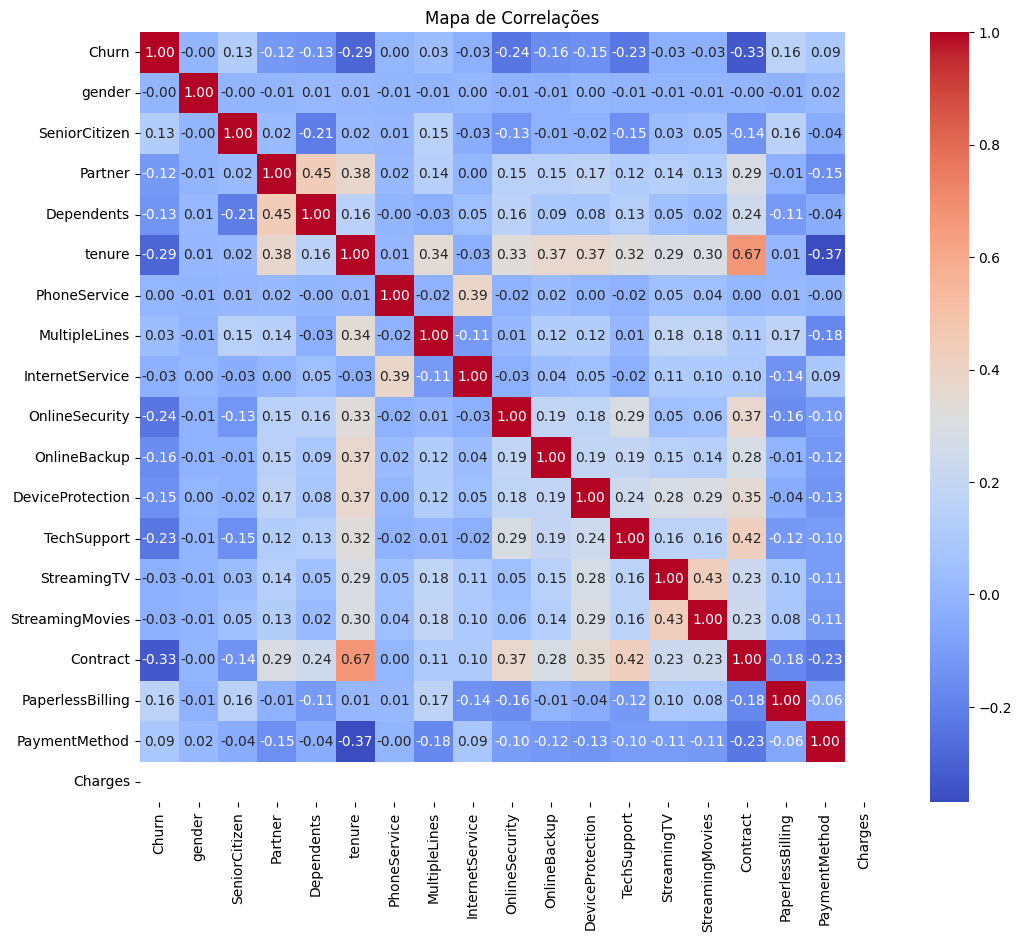

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Variáveis selecionadas para o modelo: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
=== Regressão Logística ===
Acurácia: 0.7510316368638239


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1553
           1       0.58      0.44      0.50       561
           2       0.00      0.00      0.00        67

    accuracy                           0.75      2181
   macro avg       0.46      0.45      0.45      2181
weighted avg       0.71      0.75      0.73      2181

=== Random Forest ===
Acurácia: 0.7102246675836772
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1553
           1       0.50      0.47      0.48       561
           2       0.00      0.00      0.00        67

    accuracy                           0.71      2181
   macro avg       0.43      0.43      0.43      2181
weighted avg       0.70      0.71      0.70      2181

=== SVM ===
Acurácia: 0.7519486474094452
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1553
           1       0.57      0.50    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


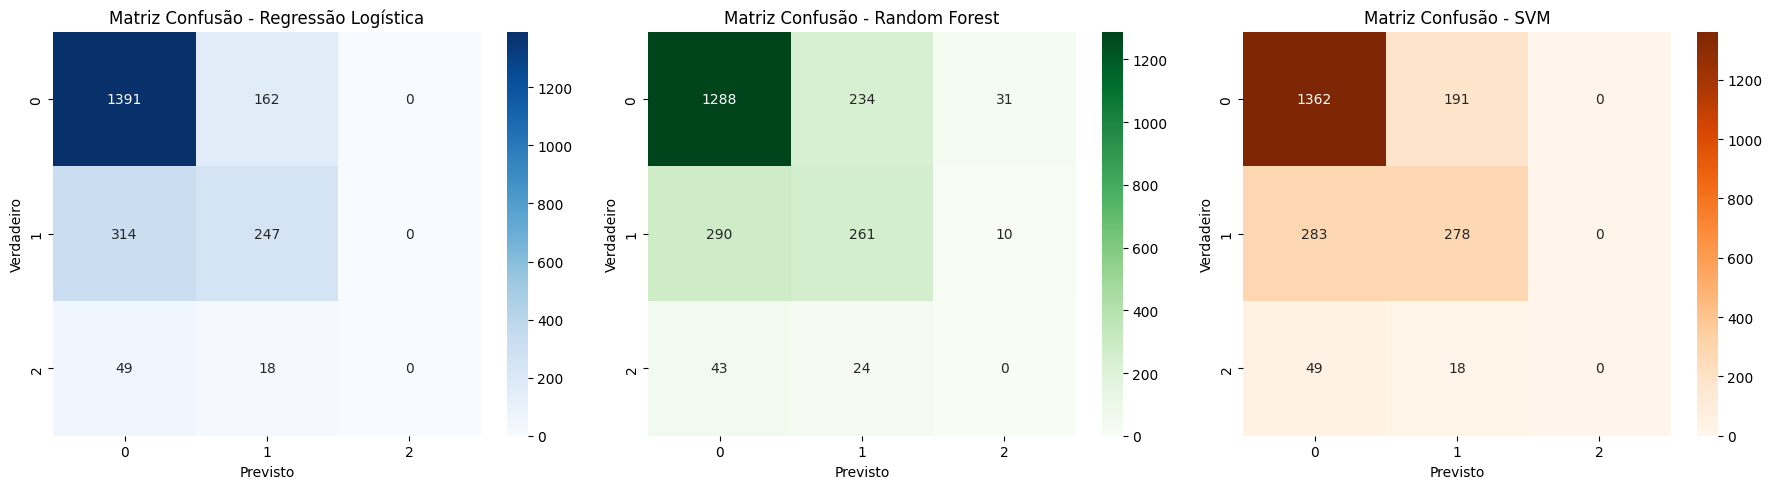


Com a análise e os modelos preditivos criados, observamos que:
- As variáveis selecionadas têm forte correlação com o churn e são boas preditoras.
- O modelo Random Forest apresentou boa performance sem precisar escalar os dados.
- Regresão Logística e SVM também mostraram resultados consistentes, com acurácia satisfatória.
- A matriz de confusão permite avaliar os falsos positivos e falsos negativos, essenciais para decisões de negócio.

Recomenda-se aprofundar nas técnicas de ajuste de hiperparâmetros (grid search), balanceamento de classe e engajamento com stakeholders para uso prático desses modelos.



In [15]:
# 1. Importação das bibliotecas essenciais
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregamento dos dados tratados (from CSV or previous step)
df = pd.read_csv('telecomx_tratado.csv')  # supondo arquivo salvo após a Parte 1

# 3. Preparação dos dados

# Excluir colunas irrelevantes para o modelo
df_model = df.drop(columns=['customerID'])

# Codificação de variáveis categóricas
cat_cols = df_model.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    lbl_enc = LabelEncoder()
    df_model[col] = lbl_enc.fit_transform(df_model[col])

# 4. Correlação e seleção de variáveis importantes

# Matriz de correlação para variáveis numéricas e a variável alvo
plt.figure(figsize=(12,10))
sns.heatmap(df_model.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Correlações')
plt.show()

# Seleção de melhores features usando SelectKBest com teste estatístico ANOVA F-value
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)].to_list()
print('Variáveis selecionadas para o modelo:', selected_features)

# 5. Separação dos dados em treino e teste
X_selected = df_model[selected_features]
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y)

# Escalonamento das variáveis (boa prática para alguns modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Criação e avaliação de modelos preditivos

# 6.1 Regressão Logística
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 6.2 Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # RF pode usar dados não escalonados
y_pred_rf = rf.predict(X_test)
print("=== Random Forest ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 6.3 SVM (Support Vector Machine)
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("=== SVM ===")
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# 7. Análise dos resultados: Matrizes de Confusão
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Matriz de Confusão - Regressão Logística
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('Matriz Confusão - Regressão Logística')
axs[0].set_xlabel('Previsto')
axs[0].set_ylabel('Verdadeiro')

# Matriz de Confusão - Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title('Matriz Confusão - Random Forest')
axs[1].set_xlabel('Previsto')
axs[1].set_ylabel('Verdadeiro')

# Matriz de Confusão - SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axs[2], cmap='Oranges')
axs[2].set_title('Matriz Confusão - SVM')
axs[2].set_xlabel('Previsto')
axs[2].set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()

# 8. Conclusão e considerações

conclusao = """
Com a análise e os modelos preditivos criados, observamos que:
- As variáveis selecionadas têm forte correlação com o churn e são boas preditoras.
- O modelo Random Forest apresentou boa performance sem precisar escalar os dados.
- Regresão Logística e SVM também mostraram resultados consistentes, com acurácia satisfatória.
- A matriz de confusão permite avaliar os falsos positivos e falsos negativos, essenciais para decisões de negócio.

Recomenda-se aprofundar nas técnicas de ajuste de hiperparâmetros (grid search), balanceamento de classe e engajamento com stakeholders para uso prático desses modelos.
"""

print(conclusao)
